In [3]:
#Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import pandas_profiling as pp

In [7]:
#Loading all data
df = pd.read_csv('../data/dataset_20220309.csv')
df.set_index('address_used', inplace = True)

In [11]:
# Summary info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 4989 entries, 1xfkoDnkE8ipF6oXcs44mPoHv3VBqDRFu to 18xBt4vSWyRzHXHG6gPMTdZr4uQNssb3Gr
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   maximum_time_between_sent_accounts       4989 non-null   int64  
 1   minimum_time_between_sent_accounts       4989 non-null   int64  
 2   average_time_between_sent_accounts       4989 non-null   float64
 3   maximum_time_between_received_accounts   4989 non-null   float64
 4   minimum_time_between_received_accounts   4989 non-null   float64
 5   average_time_between_received_accounts   4989 non-null   float64
 6   time_between_first_and_last_transaction  4989 non-null   int64  
 7   total_sent_accounts                      4989 non-null   int64  
 8   total_received_accounts                  4989 non-null   int64  
 9   total_number_of_transactions             4989 non-null   int6

,maximum_time_between_sent_accounts,minimum_time_between_sent_accounts,average_time_between_sent_accounts,maximum_time_between_received_accounts,minimum_time_between_received_accounts,average_time_between_received_accounts,time_between_first_and_last_transaction,total_sent_accounts,total_received_accounts,total_number_of_transactions,...,average_sent_value,total_sent_value,account_balance,account_creation_time,account_active_duration,gini_coefficient_accounts_received,gini_coefficient_accounts_sent,gini_coefficient_values_received,gini_coefficient_values_sent,ponzi
count,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,...,4989.000000,4989.000000,4.989000e+03,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000
mean,18623.845059,5416.811385,8796.122505,12484.813189,2229.796552,4174.325363,30930.677090,72.536180,90.503107,163.039286,...,4.795198,398.592025,3.844674e+06,272441.755061,35066.277611,0.544403,0.455597,0.501402,0.498598,0.100220
std,47336.702303,28626.288335,31087.972058,34495.762849,15786.692190,17621.351965,65185.115755,2869.420905,3021.559167,5888.305319,...,35.927917,14650.345563,1.598018e+08,80389.542337,72267.597340,0.092455,0.092455,0.015301,0.015301,0.300324
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,...,0.000001,0.000003,0.000000e+00,107396.000000,0.000000,0.428571,0.002793,0.500000,0.022196,0.000000
25%,24.000000,2.000000,16.000000,5.000000,0.000000,3.000000,45.000000,2.000000,2.000000,4.000000,...,0.022450,0.093700,0.000000e+00,211490.000000,57.000000,0.500000,0.454545,0.500000,0.500000,0.000000
50%,1275.000000,18.000000,498.000000,554.000000,3.000000,192.500000,2277.000000,3.000000,3.000000,6.000000,...,0.163100,0.860000,0.000000e+00,273420.000000,2908.000000,0.500000,0.500000,0.500000,0.500000,0.000000
75%,11245.000000,545.000000,3798.222222,7722.000000,126.000000,1886.000000,27215.000000,6.000000,9.000000,16.000000,...,1.010625,6.440876,0.000000e+00,333583.000000,31362.000000,0.545455,0.500000,0.500000,0.500000,0.000000
max,552606.000000,552606.000000,552606.000000,558871.000000,558871.000000,558871.000000,558875.000000,197694.000000,206968.000000,404662.000000,...,1250.000275,937260.220800,1.090000e+10,449634.000000,569340.000000,0.997207,0.571429,0.977804,0.500000,1.000000


In [ ]:
#Forcing data to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        print('Non-numeric column detected:', col)
        df[col] = pd.to_numeric(df[col], errors = 'coerce')

In [13]:
pp.ProfileReport(df, minimal=True)

Summarize dataset:   0%|          | 0/38 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
#For further exploration please, e.g. plot distributions of ponzi vs non-ponzi
ponzi_frac = sum(df.ponzi) / df.shape[0]
print(ponzi_frac)
'''This is a highly imbalanced dataset. Techniques to overcome this include:
1. Oversampling the under-represented class (preferred when dataset is small <10^4)
2. Undersampling the over-represented class (preferred when dataset is large >10^4)
3. Anomaly detection techniques'''

0.10022048506714773


'This is a highly imbalanced dataset. Techniques to overcome this include:\n1. Oversampling the under-represented class (preferred when dataset is small <10^4)\n2. Undersampling the over-represented class (preferred when dataset is large >10^4)\n3. Anomaly detection techniques'

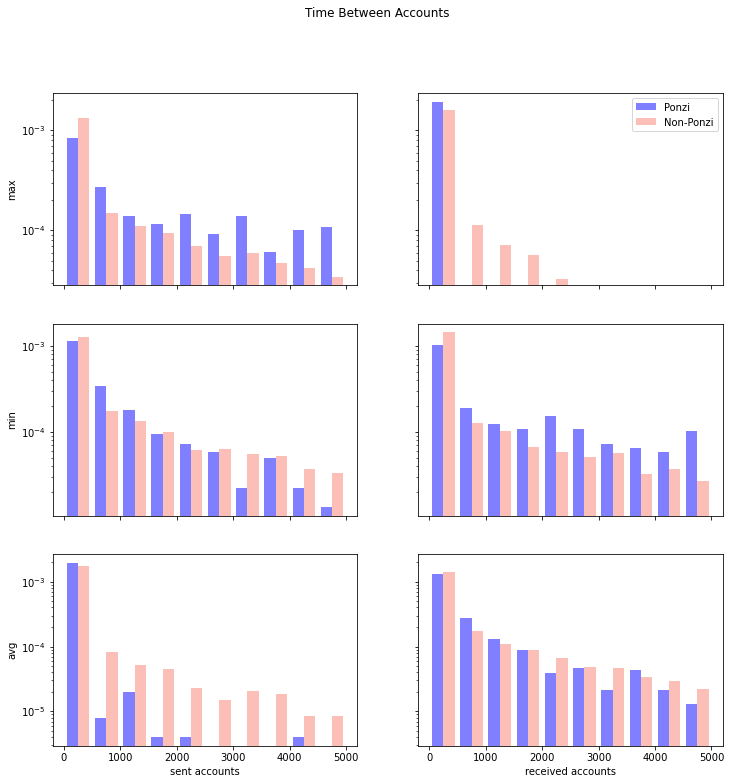

In [20]:
fig, axs = plt.subplots(3, 2, sharex = 'col', sharey = 'row', figsize = (12, 12))
fig.suptitle('Time Between Accounts')
for i in range(6):
    axs[i//2, i%2].hist([df.loc[df.ponzi == 1, df.columns[i]].dropna(), df.loc[df.ponzi == 0, df.columns[i]].dropna()],
                        range = (0, 5000), density = True, alpha = 0.5, stacked = False, color = ['blue','salmon'], log = True)
    if i == 1:
        axs[i//2, i%2].legend(['Ponzi', 'Non-Ponzi'])
    if i >= 4:
        axs[i//2, i%2].set_xlabel(['sent accounts', 'received accounts'][i%2])
    if i%2 == 0:
        axs[i//2, i%2].set_ylabel(['max', 'min', 'avg'][i//2])
plt.show()

In [10]:
'''Some non-linearity observed.
e.g. without accounting for class priors, if avg received accounts is small, probability of non-ponzi is higher than ponzi
but if min received accounts is about 1000, probability of ponzi is higher,
but if min received accounts is about 4000, probability of non-ponzi is higher

This suggests that linear models (e.g. logistic regression, naive bayes) may not work very well'''

'Some non-linearity observed.\ne.g. without accounting for class priors, if avg received accounts is small, probability of non-ponzi is higher than ponzi\nbut if min received accounts is about 1000, probability of ponzi is higher,\nbut if min received accounts is about 4000, probability of non-ponzi is higher\n\nThis suggests that linear models (e.g. logistic regression, naive bayes) may not work very well'

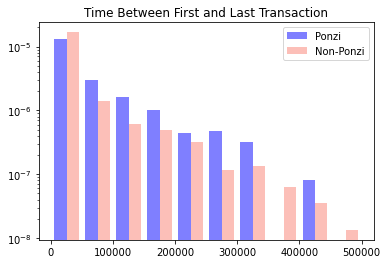

In [22]:
plt.hist([df.loc[df.ponzi == 1, df.columns[6]].dropna(), df.loc[df.ponzi == 0, df.columns[6]].dropna()],
         range = (0, 500000), density = True, alpha = 0.5, stacked = False, color = ['blue','salmon'], log = True)
plt.title('Time Between First and Last Transaction')
plt.legend(['Ponzi', 'Non-Ponzi'])
plt.show()

In [12]:
'''Why the ponzi spike at ~180k?'''

'Why the ponzi spike at ~180k?'

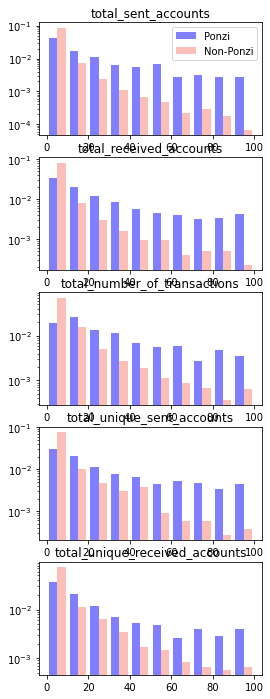

In [23]:
fig, axs = plt.subplots(5, figsize = (4, 12))
for i in range(7, 12):
    axs[i-7].hist([df.loc[df.ponzi == 1, df.columns[i]].dropna(), df.loc[df.ponzi == 0, df.columns[i]].dropna()],
                        range = (0, 100), density = True, alpha = 0.5, stacked = False, color = ['blue','salmon'], log = True)
    axs[i-7].set_title(df.columns[i])
    if i == 7:
        axs[i-7].legend(['Ponzi', 'Non-Ponzi'])
plt.show()

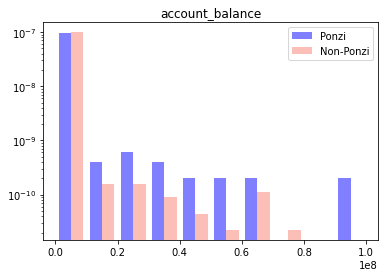

In [24]:
plt.hist([df.loc[df.ponzi == 1, df.columns[20]].dropna(), df.loc[df.ponzi == 0, df.columns[20]].dropna()],
         range = (0, 100000000), density = True, alpha = 0.5, stacked = False, color = ['blue','salmon'], log = True)
plt.title(df.columns[20])
plt.legend(['Ponzi', 'Non-Ponzi'])
plt.show()

In [15]:
'''Most accounts have 0 amount. We may consider bin this data into 0, up to 10^1, up to 10^2...'''

'Most accounts have 0 amount. We may consider bin this data into 0, up to 10^1, up to 10^2...'

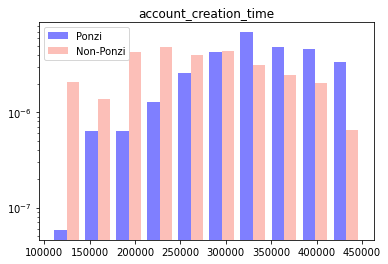

In [25]:
plt.hist([df.loc[df.ponzi == 1, df.columns[21]].dropna(), df.loc[df.ponzi == 0, df.columns[21]].dropna()],
         density = True, alpha = 0.5, stacked = False, color = ['blue','salmon'], log = True)
plt.title(df.columns[21])
plt.legend(['Ponzi', 'Non-Ponzi'])
plt.show()

In [22]:
'''Is this pattern due to which blocks are sampled?'''

'Is this pattern due to which blocks are sampled?'

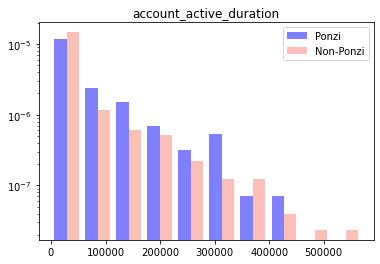

In [26]:
plt.hist([df.loc[df.ponzi == 1, df.columns[22]].dropna(), df.loc[df.ponzi == 0, df.columns[22]].dropna()],
         density = True, alpha = 0.5, stacked = False, color = ['blue','salmon'], log = True)
plt.title(df.columns[22])
plt.legend(['Ponzi', 'Non-Ponzi'])
plt.show()

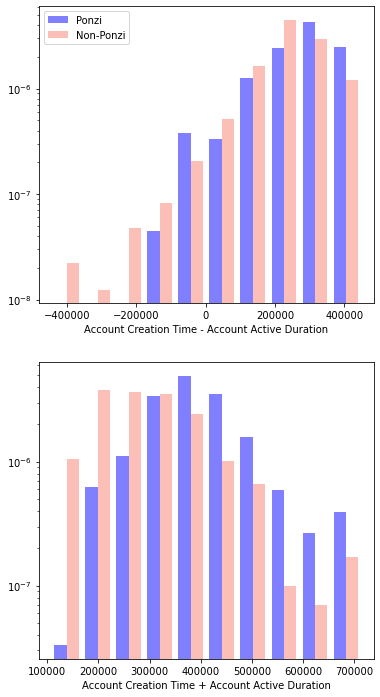

In [27]:
fig, axs = plt.subplots(2, figsize = (6, 12))
axs[0].hist([df.loc[df.ponzi == 1, 'account_creation_time'] - df.loc[df.ponzi == 1, 'account_active_duration'],
            df.loc[df.ponzi == 0, 'account_creation_time'] - df.loc[df.ponzi == 0, 'account_active_duration']],
           density = True, alpha = 0.5, stacked = False, color = ['blue','salmon'], log = True)
axs[0].legend(['Ponzi', 'Non-Ponzi'])
axs[0].set_xlabel('Account Creation Time - Account Active Duration')
axs[1].hist([df.loc[df.ponzi == 1, 'account_creation_time'] + df.loc[df.ponzi == 1, 'account_active_duration'],
            df.loc[df.ponzi == 0, 'account_creation_time'] + df.loc[df.ponzi == 0, 'account_active_duration']],
           density = True, alpha = 0.5, stacked = False, color = ['blue','salmon'], log = True)
axs[1].set_xlabel('Account Creation Time + Account Active Duration')
plt.show()

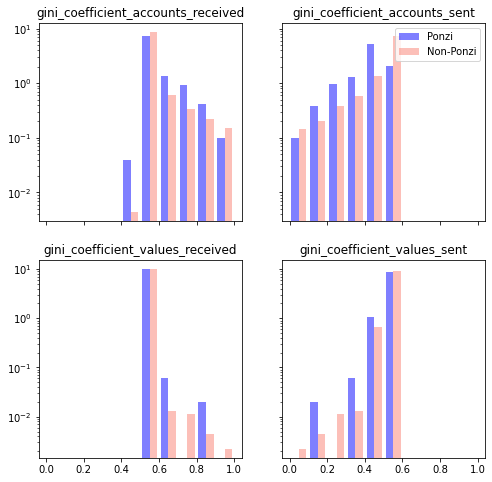

In [28]:
fig, axs = plt.subplots(2, 2, sharex = 'col', sharey = 'row', figsize = (8, 8))
for i in range(23, 27):
    axs[(i-23)//2, (i-1)%2].hist([df.loc[df.ponzi == 1, df.columns[i]].dropna(), df.loc[df.ponzi == 0, df.columns[i]].dropna()],
                   range = (0, 1), density = True, alpha = 0.5, stacked = False, color = ['blue','salmon'], log = True)
    axs[(i-23)//2, (i-1)%2].set_title(df.columns[i])
axs[0, 1].legend(['Ponzi', 'Non-Ponzi'])
plt.show()

C:\Users\quekh\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


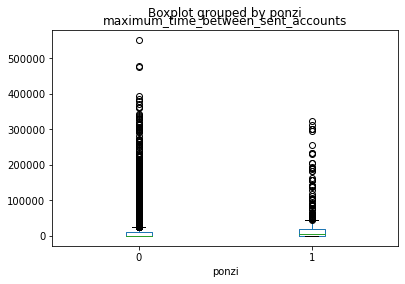

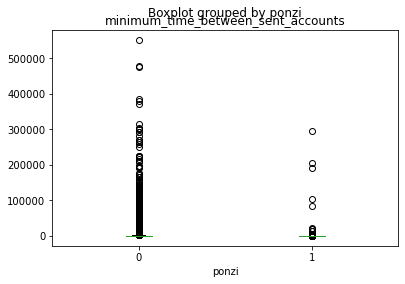

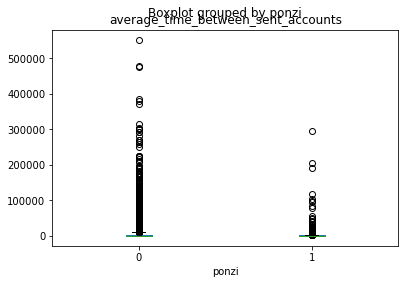

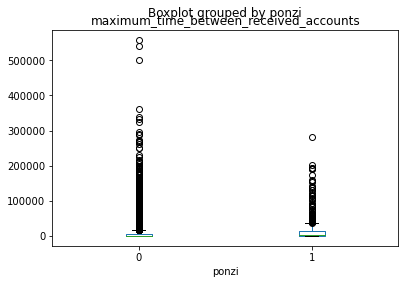

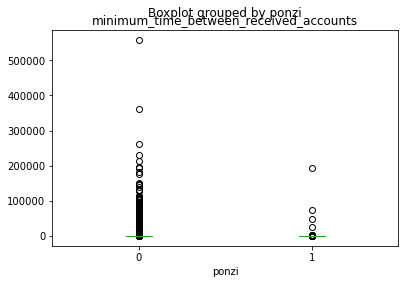

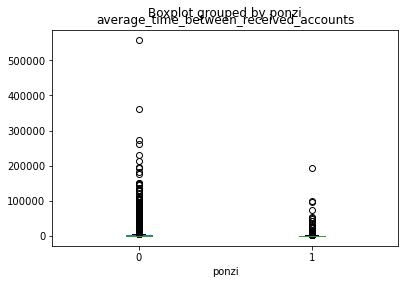

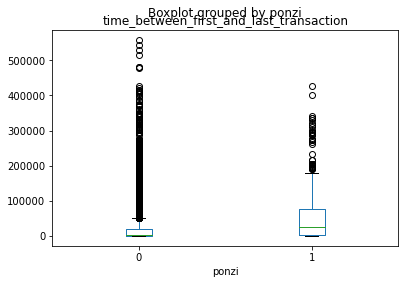

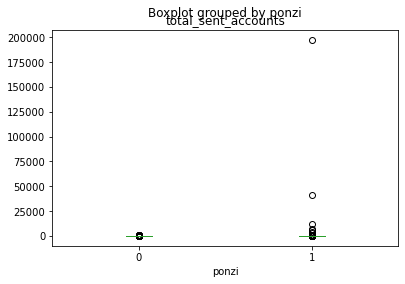

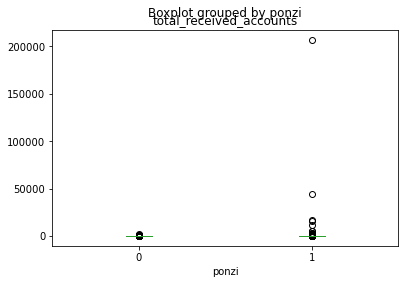

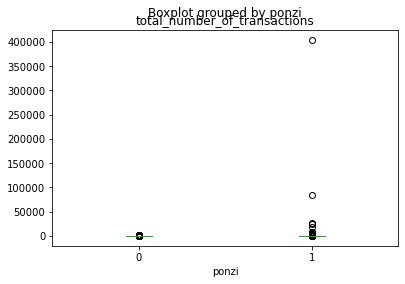

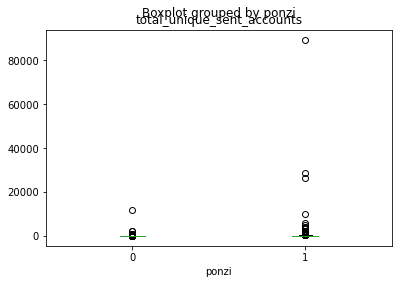

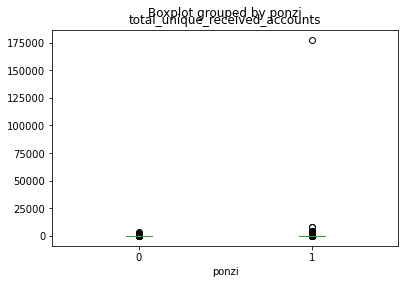

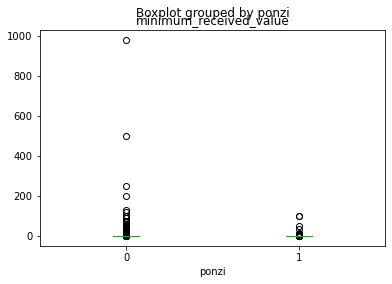

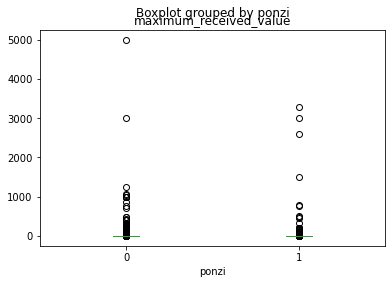

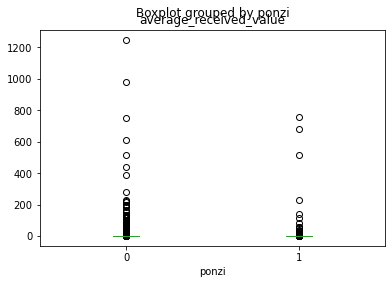

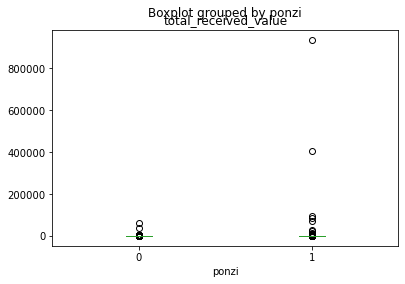

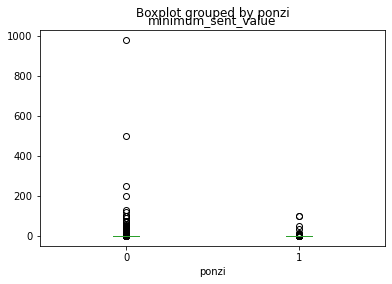

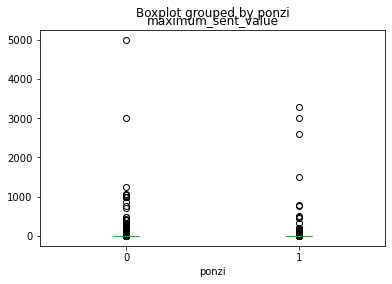

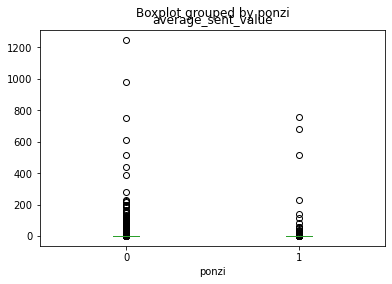

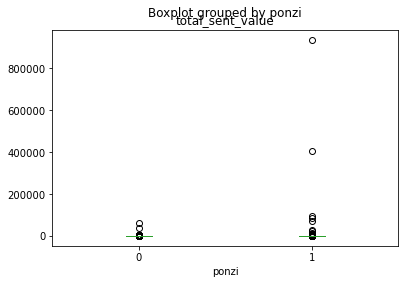

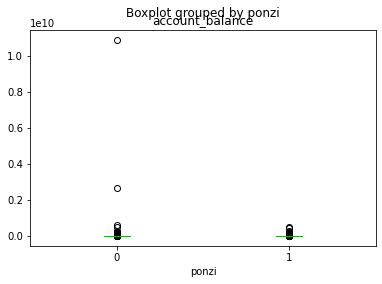

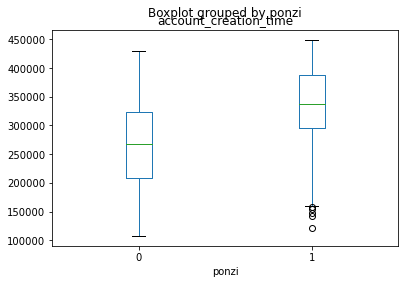

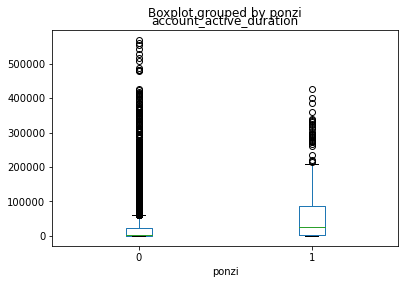

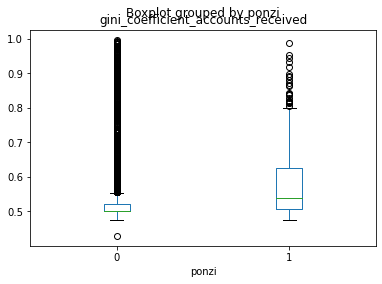

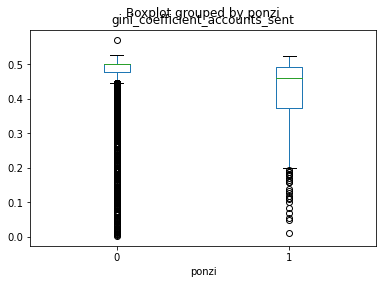

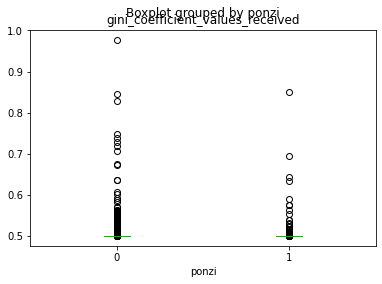

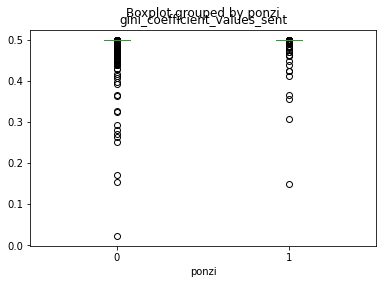

In [29]:
for cn in df.columns:
    if cn != 'ponzi':
        df.boxplot(column=cn, by='ponzi', grid=False)

<AxesSubplot:>

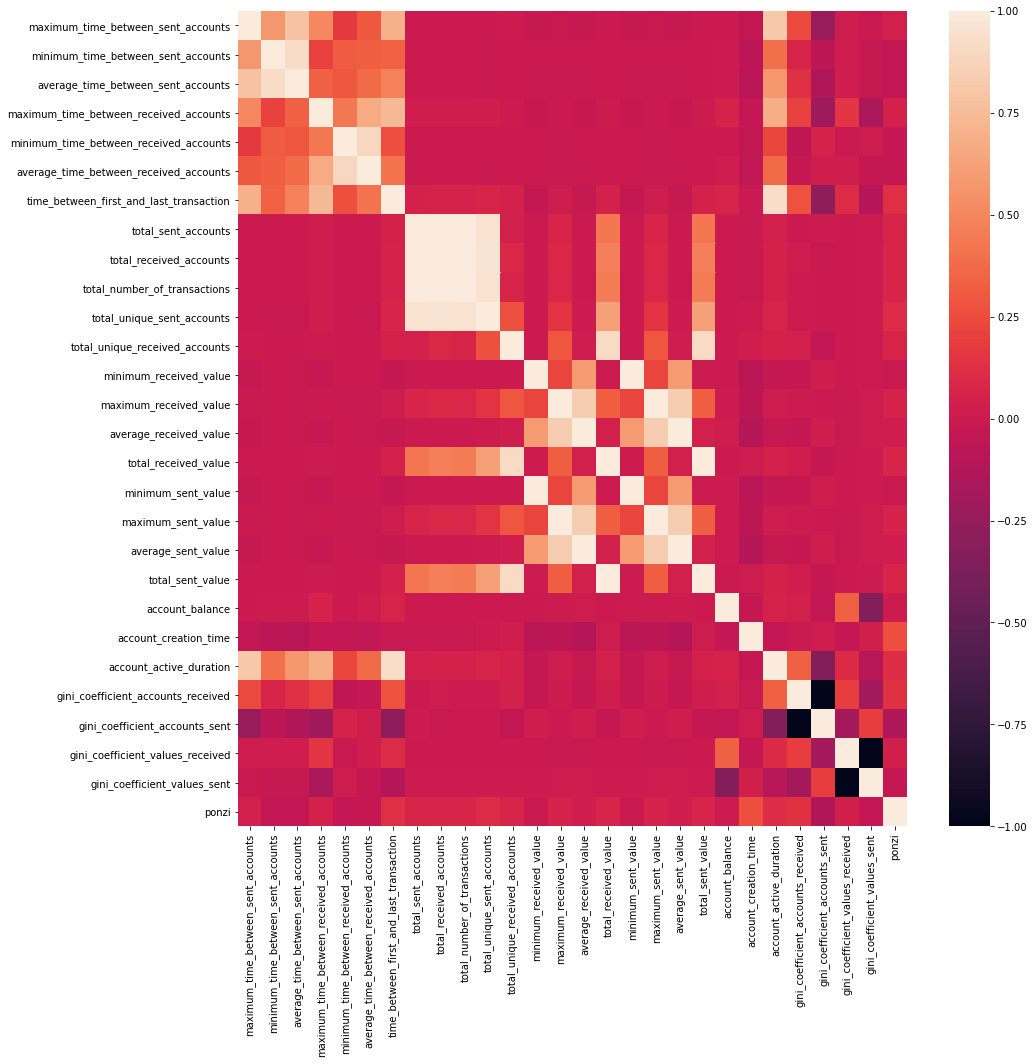

In [30]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr())